# Visualizando dados
---

### <i>Eu acredito que visualização é um dos mais poderosos meios de conquistar objetivos pessoais</i>
    Harvey Mackay

### Uma parte fundamental do kit de ferramentas do cientista de dados é a visualização de dados. Mesmo que seja muito fácil de produzir visualizações, é difícil produzir visualizações boas.

### Existem dois usos primários pra visualização de dados:
- ### Para <i>explorar</i> dados
- ### Para <i>comunicar</i> dados

### Nesse capítulo, construiremos as habilidades para começar a explorar seus próprios dados e para produzir as visualizações que iremos utilizar pelo resto do livro.

## <b>matplotlib</b>

### Existe uma grande variedade de ferramentas para visualizar dados. Nós utilizaremos a library matplotlib, que é muito utilizada nesse ramo. Se você estiver interessado em elaborar visualizações interativas para a web, provavelmente não é a escolha certa; porém, para gráficos simples, funciona muito bem.

In [5]:
from matplotlib import pyplot as plt

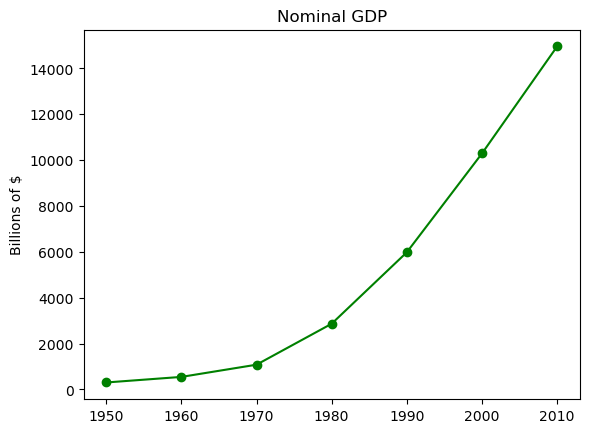

In [12]:
anos = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# cria um gráfico de linha, anos no eixo x, gdp no eixo y
plt.plot(anos, gdp, color = "green",
         marker="o", linestyle = "solid")

# adiciona um título
plt.title("Nominal GDP")

# adiciona uma legenda para o eixo y
plt.ylabel("Billions of $")

plt.show()

### Fazer plots que pareçam de alta qualidade é mais complicado e além do escopo desse capítulo. Existem muitas maneiras de customizar seus gráficos, como por exemplo: legendas de eixo, estilo de linha e marcadores de ponto. Ao invés de tentar um tratamento compreensivo dessas opções, elas serão simplesmente usadas nos exemplos.

## Gráficos de barra

### Um gráfico de barra é uma boa escolha quando você quer mostrar como alguma quantidade varia sobre um grupo discreto de itens. A próxima figura demonstra quantos Academy Awards foram ganhados por cada variedade de filmes.

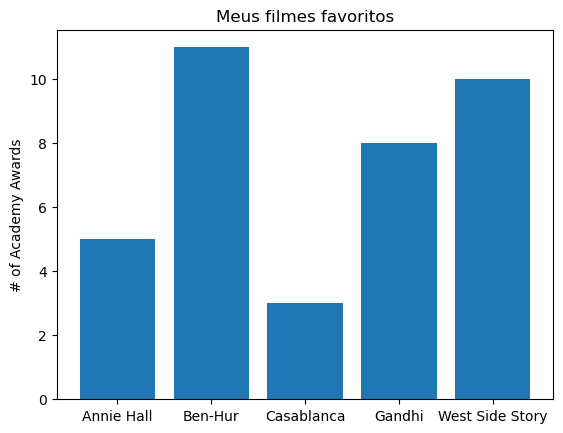

In [14]:
filmes = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
numero_de_oscars = [5, 11, 3, 8, 10]

plt.bar(range(len(filmes)), numero_de_oscars) # range(len(filmes)) produz um gerador de 0 a 4

plt.title("Meus filmes favoritos")
plt.ylabel("# of Academy Awards")

plt.xticks(range(len(filmes)), filmes)

plt.show()

### Um gráfico de barras também pode ser uma boa escolha para plotar histogramas de valores numéricos em buckets, com o objetivo de visualizar como esses valores estão distribuídos:

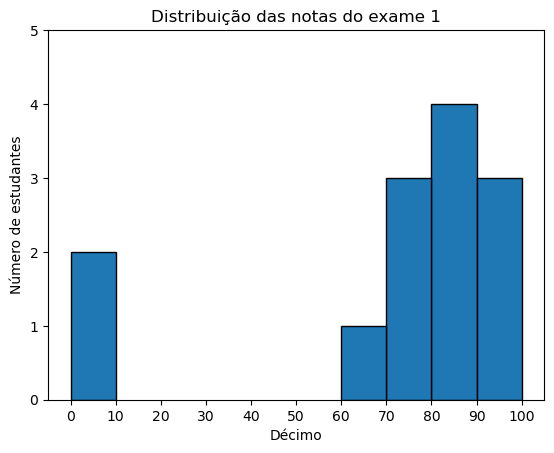

In [24]:
from collections import Counter

notas = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# separa as notas em décimos, mas coloca o 100 na mesma medida dos 90s 
histograma = Counter(min(nota // 10 * 10, 90) for nota in notas)

plt.bar([x + 5 for x in histograma.keys()], # empurra a barra 5 unidades pra direita
        list(histograma.values()), # dá a cada barra sua altura correta
        10, # dá a cada barra a largura de 10
        edgecolor=(0,0,0)) # bordas pretas pra cada barra

plt.axis([-5, 105, 0, 5]) # eixo x vai de -5 a 105, eixo y vai de 0 a 5

plt.xticks([10 * i for i in range(11)]) # coloca as legendas de 0, 10, ..., 100
plt.xlabel("Décimo")
plt.ylabel("Número de estudantes")
plt.title("Distribuição das notas do exame 1")
plt.show()

### O terceiro argumento define a largura das barras. Escolhemos uma largura de 10 unidades para preencher completamente o décimo. Nós também empurramos as barras à direita por 5 unidades, então, por exemplo, a barra do "10" (que corresponde ao décimo 10-20) teria seu centro em 15, ocupando o lugar correto. Também adicionamos uma borda preta à barras para fazê-las visualmente distintas.

### A chamada a plt.axis indica que quermos o eixo x no range -5 a 105 (para deixar um espaço antes e depois do gráfico começar), e que o range do eixo y deveria ir de 0 a 5. E a chamada a plt.xticks coloca legendas no eixo x em 0, 10, 20, ..., 100.

### Cuidado utilizando plt.axis. Criar gráficos de barra é considerado especialmente ruim quando o eixo y não começa no 0, já que essa é uma maneira fácil de enganar pessoas.

Text(0.5, 1.0, "Veja que aumento 'enorme'!")

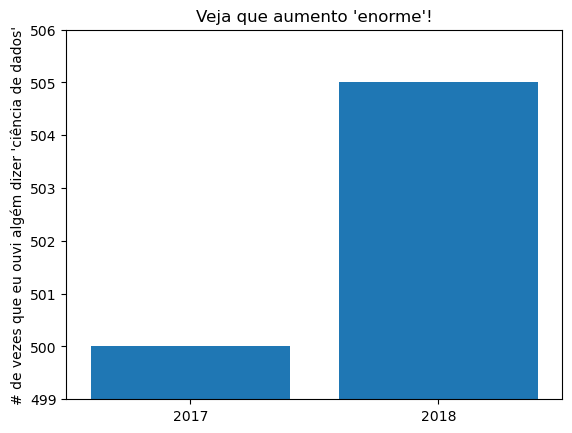

In [40]:
mencoes = [500, 505]
anos = [2017, 2018]

plt.bar(anos, mencoes, 0.8)
plt.xticks(anos)
plt.ylabel("# de vezes que eu ouvi algém dizer 'ciência de dados'")

# se você não fizer isso, matplotlib vai nomear o eixo x 0, 1 e então adicionar um
# +2.013e3 no canto (matplotlib mal)
plt.ticklabel_format(useOffset=False)

# enganando para que o gráfico só mostre a parte a partir de 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Veja que aumento 'enorme'!")

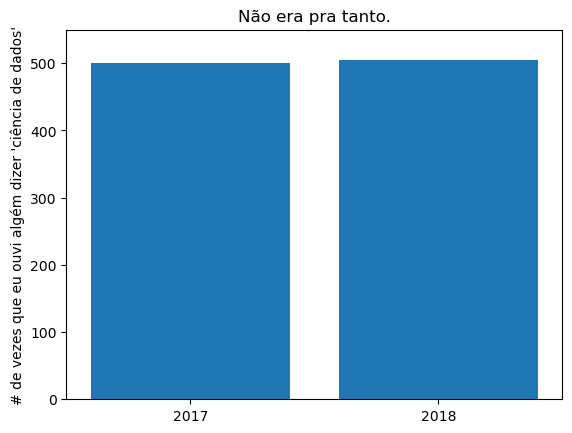

In [43]:
plt.bar(anos, mencoes, 0.8)
plt.xticks(anos)
plt.ylabel("# de vezes que eu ouvi algém dizer 'ciência de dados'")

# se você não fizer isso, matplotlib vai nomear o eixo x 0, 1 e então adicionar um
# +2.013e3 no canto (matplotlib mal)
plt.ticklabel_format(useOffset=False)

plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Não era pra tanto.")
plt.show()

## Gráfico de linha

### Como nós já vimos, podemos fazer gráficos de linha utilizando plt.plot. Eles são uma boa escolha para mostrar tendências:

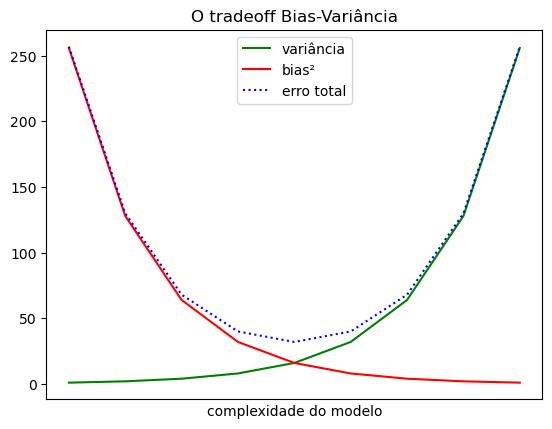

In [48]:
variancia = [1, 2, 4, 8, 16, 32, 64, 128, 256]
vies_ao_quadrado = [256, 128, 64, 32, 16, 8, 4, 2, 1]
erro_total = [x + y for x, y in zip(variancia, vies_ao_quadrado)]
xs = [i for i, _ in enumerate(variancia)]

# nós podemos chamar várias chamadas ao plt.plot para mostrar multiplas séries no mesmo grafico

plt.plot(xs, variancia, "g-", label="variância")
plt.plot(xs, vies_ao_quadrado, "r-", label="bias²")
plt.plot(xs, erro_total, "b:", label="erro total")

# como ligamos legendas para cada série, podemos ter uma legenda de graça (loc=9 é top center)

plt.legend(loc=9)
plt.xlabel("complexidade do modelo")
plt.xticks([])
plt.title("O tradeoff Bias-Variância")
plt.show()

## Gráfico de dispersão

### Gráficos de dispersão são a escolha certa para visualização da relação entre dois conjuntos pareados de dados. O próximo gráfico exibe a relação entre a quantidade de amigos que algúem tem e o número de minutos que a pessoa passa na plataforma:

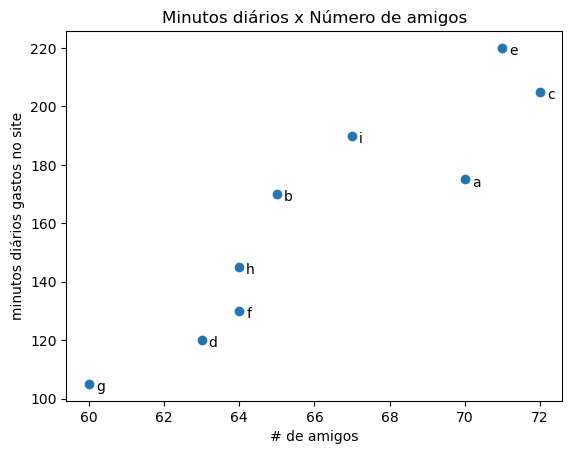

In [49]:
amigos = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutos = [175, 170, 205, 120, 220, 130, 105, 145, 190]
legendas = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(amigos, minutos)

# legenda todos os pontos
for legenda, quantidade_amigos, quantidade_minutos in zip(legendas, amigos, minutos):
    plt.annotate(legenda,
                 xy = (quantidade_amigos, quantidade_minutos),
                 xytext=(5, -5),
                 textcoords="offset points")
    
plt.title("Minutos diários x Número de amigos")
plt.xlabel("# de amigos")
plt.ylabel("minutos diários gastos no site")
plt.show()

### Se você estiver analisando variáveis comparáveis, você talvez receba uma figura enganosa se deixar o matplotlib escolher a escala, como na figura:

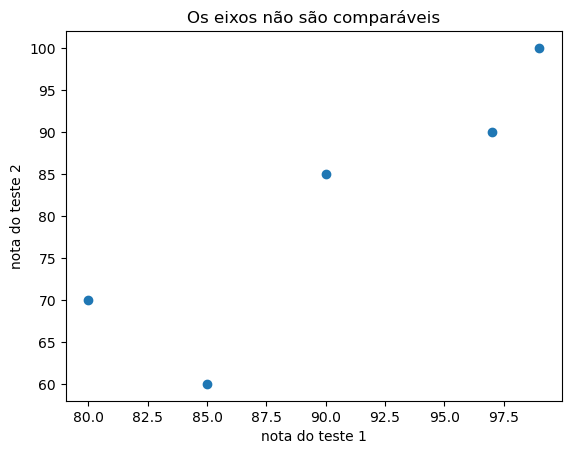

In [50]:
notas_teste_1 = [99, 90, 85, 97, 80]
notas_teste_2 = [100, 85, 60, 90, 70]

plt.scatter(notas_teste_1, notas_teste_2)
plt.title("Os eixos não são comparáveis")
plt.xlabel("nota do teste 1")
plt.ylabel("nota do teste 2")
plt.show()

### Se nós incluirmos uma chamada a plt.axis("equal"), o plot mostra mais precisamente que a maior variação ocorre no teste 2.

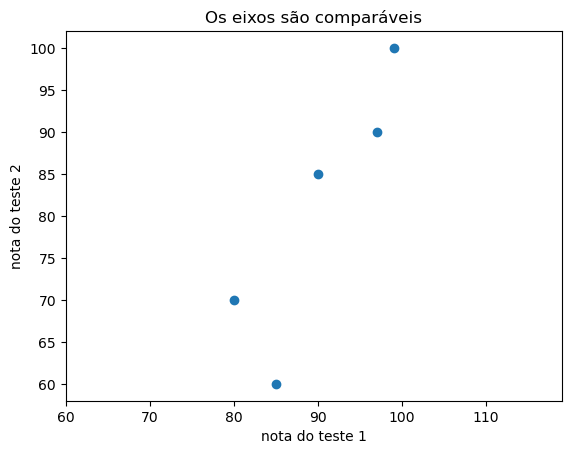

In [52]:
notas_teste_1 = [99, 90, 85, 97, 80]
notas_teste_2 = [100, 85, 60, 90, 70]

plt.scatter(notas_teste_1, notas_teste_2)
plt.title("Os eixos são comparáveis")
plt.xlabel("nota do teste 1")
plt.ylabel("nota do teste 2")
plt.axis("equal")
plt.show()

### <b>Para exploração</b>
- ### A <a href = "https://matplotlib.org/gallery.html" style="color:red">Galeria do matplotlib</a> vai te dar uma boa ideia dos tipos de coisas que podem ser feitas com matplotlib (e como fazê-las)
- ### <a href = "https://seaborn.pydata.org/" style="color:red">seaborn</a> é construído com base em matplotlib, e te permite produzir facilmente vizualizações mais bonitas (e complexas)
- ### <a href = "https://altair-viz.github.io/" style="color:red">Altair</a> é uma nova lib de python para criar visualizações declarativas
- ### <a href = "https://d3js.org/" style="color:red">D3.js</a> é uma lib de javascript para produzir visualizações sofisticadas e interativas para web. Mesmo que não seja em python, é muito utilizada.
- ### <a href = "https://docs.bokeh.org/en/latest/" style = "color:red">Bokeh</a> é uma lib que traz visualizações do estilo do D3.js para python

### Com isso, conclui-se o capítulo 3; matplotlib será uma biblioteca muito útil.